# 03 - Training Results - Networks Fine-tuned on Selected Loss Function (DF20)

In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd

from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/danish_fungi_dataset/training_history/baselines_with_loss/'


def get_result_df(df, params):
    group_dict = {
        'EfficientNet-B0': results.filter_items(df, outlen=30, model='efficientnet_b0', **params),
        'ViT-Base-224': results.filter_items(df, outlen=30, model='vit_base_224', **params),

        'EfficientNet-B4': results.filter_items(df, outlen=30, model='efficientnet_b4', **params),
        'NoisyStudent-B4': results.filter_items(df, outlen=30, model='efficientnet_b4_ns', **params),
        'EfficientNetV2-S': results.filter_items(df, outlen=30, model='efficientnetv2_s', **params),

        'ViT-Base-384': results.filter_items(df, outlen=30, model='vit_base_384', **params),
        'DeiT-Base-384': results.filter_items(df, outlen=30, model='deit_base_384', **params),
        'BEiT-Base-384': results.filter_items(df, outlen=30, model='beit_base_384', **params),

        # 'ViT-Large-224': results.filter_items(df, outlen=30, model='vit_large_224', **params),
        'ViT-Large-384': results.filter_items(df, outlen=30, model='vit_large_384', **params)}
    result_df = results.get_metrics_and_time_df(group_dict, primary_metric='f1_score')
    return result_df, group_dict


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_name,history_file,specs_name,model,loss,opt,no_epochs,batch_size,total_batch_size,learning_rate,weight,dataset,scheduler,beta,pretrained_checkpoint,input_size,image_mean,image_std,date
0,df2020_efficientnet_b4_ce_12-24-2021_13-17-14,df2020_efficientnet_b4_ce_12-24-2021_13-17-14.csv,df2020_efficientnet_b4_ce_12-24-2021_13-17-14....,efficientnet_b4,ce,sgd,30,32,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,tf_efficientnet_b4,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",24-2021_13-17-14
1,df2020_vit_base_384_ce_12-24-2021_13-17-47,df2020_vit_base_384_ce_12-24-2021_13-17-47.csv,df2020_vit_base_384_ce_12-24-2021_13-17-47.json,vit_base_384,ce,sgd,30,32,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,google/vit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",24-2021_13-17-47
2,df2020_efficientnet_b0_ce_12-24-2021_13-17-47,df2020_efficientnet_b0_ce_12-24-2021_13-17-47.csv,df2020_efficientnet_b0_ce_12-24-2021_13-17-47....,efficientnet_b0,ce,sgd,30,64,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,tf_efficientnet_b0,224,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",24-2021_13-17-47
3,df2020_vit_large_384_ce_12-24-2021_13-17-47,df2020_vit_large_384_ce_12-24-2021_13-17-47.csv,df2020_vit_large_384_ce_12-24-2021_13-17-47.json,vit_large_384,ce,sgd,30,16,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,google/vit-large-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",24-2021_13-17-47
4,df2020_vit_base_224_ce_12-24-2021_22-20-40,df2020_vit_base_224_ce_12-24-2021_22-20-40.csv,df2020_vit_base_224_ce_12-24-2021_22-20-40.json,vit_base_224,ce,sgd,30,64,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,google/vit-base-patch16-224,224,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",24-2021_22-20-40
5,df2020_efficientnet_b4_ns_ce_12-25-2021_10-22-25,df2020_efficientnet_b4_ns_ce_12-25-2021_10-22-...,df2020_efficientnet_b4_ns_ce_12-25-2021_10-22-...,efficientnet_b4_ns,ce,sgd,30,32,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,tf_efficientnet_b4_ns,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",25-2021_10-22-25
6,df2020_deit_base_384_ce_12-25-2021_11-25-04,df2020_deit_base_384_ce_12-25-2021_11-25-04.csv,df2020_deit_base_384_ce_12-25-2021_11-25-04.json,deit_base_384,ce,sgd,30,32,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,facebook/deit-base-patch16-384,384,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",25-2021_11-25-04
7,df2020_efficientnetv2_s_ce_12-26-2021_06-59-07,df2020_efficientnetv2_s_ce_12-26-2021_06-59-07...,df2020_efficientnetv2_s_ce_12-26-2021_06-59-07...,efficientnetv2_s,ce,sgd,30,64,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,tf_efficientnetv2_s,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",26-2021_06-59-07
8,df2020_beit_base_384_ce_12-26-2021_09-31-16,df2020_beit_base_384_ce_12-26-2021_09-31-16.csv,df2020_beit_base_384_ce_12-26-2021_09-31-16.json,beit_base_384,ce,sgd,30,32,64,0.01,class_balanced,full,reduce_lr_on_plateau,0.9999,microsoft/beit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",26-2021_09-31-16


,accuracy,top_3,f1_score,mean_epoch_time,total_time
EfficientNet-B0,66.7,83.0,59.3,19m,9h 02m
ViT-Base-224,71.6,86.1,65.0,18m,8h 58m
EfficientNet-B4,74.1,88.0,67.5,43m,21h 04m
NoisyStudent-B4,75.0,88.8,68.4,42m,20h 35m
EfficientNetV2-S,75.5,88.7,69.1,36m,17h 31m
ViT-Base-384,77.4,89.9,71.3,45m,22h 06m
DeiT-Base-384,76.4,88.9,70.1,45m,22h 05m
BEiT-Base-384,76.4,89.3,70.3,51m,25h 03m
ViT-Large-384,79.4,91.0,73.4,2h 01m,60h 22m


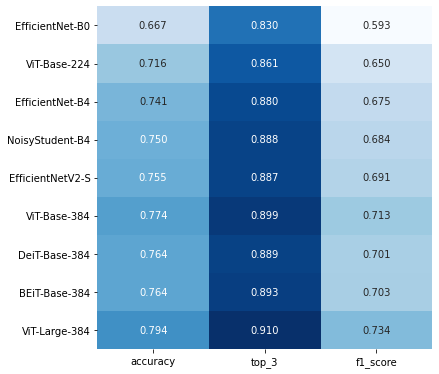

In [3]:
params = dict(loss='ce', opt='sgd', total_batch_size=64)
result_df, group_dict = get_result_df(df, params)
viz.heatmap(result_df)
result_df.round(3) * ([100] * 3 + [1, 1])

In [5]:
BASELINES_DATA_DIR = 'data/danish_fungi_dataset/training_history/baselines/'

# load specification and progress data
baselines_specs_df = results.load_specs_files(BASELINES_DATA_DIR)
baselines_df = results.load_progress_files(baselines_specs_df, path=BASELINES_DATA_DIR)

params = dict(loss='ce', opt='sgd', total_batch_size=64)
baselines_result_df, _ = get_result_df(baselines_df, params)

In [6]:
_baselines_result_df = baselines_result_df.copy()
_baselines_result_df.columns = pd.MultiIndex.from_product([_baselines_result_df.columns, ['Baseline']])
_result_df = result_df.copy()
_result_df.columns = pd.MultiIndex.from_product([_result_df.columns, ['Adj. Loss']])

eval_df = pd.concat([_baselines_result_df, _result_df], axis=1)
for met in ['accuracy', 'top_3', 'f1_score']:
    eval_df[met, 'Diff'] = eval_df[met, 'Adj. Loss'] - eval_df[met, 'Baseline']

_df = eval_df[['accuracy', 'top_3', 'f1_score']].round(3) * 100
for met in ['accuracy', 'top_3', 'f1_score']:
    _df[met, 'Diff'] = '+' + _df[met, 'Diff'].round(1).fillna('').astype(str).replace('+', np.nan)
    _df[met, 'Diff'] = _df[met, 'Diff'].str.replace('+-', '-', regex=False)
_df

accuracy                    top_3                 f1_score  \
                 Baseline Adj. Loss  Diff Baseline Adj. Loss  Diff Baseline   
EfficientNet-B0      67.7      66.7  -1.0     83.3      83.0  -0.3     58.2   
ViT-Base-224         73.4      71.6  -1.7     87.0      86.1  -0.9     66.0   
EfficientNet-B4      74.8      74.1  -0.7     88.2      88.0  -0.2     66.1   
NoisyStudent-B4      76.3      75.0  -1.3     89.0      88.8  -0.2     68.1   
EfficientNetV2-S     76.7      75.5  -1.2     89.2      88.7  -0.5     68.0   
ViT-Base-384         78.7      77.4  -1.4     90.5      89.9  -0.6     71.7   
DeiT-Base-384        78.0      76.4  -1.5     89.9      88.9  -1.1     70.9   
BEiT-Base-384        77.1      76.4  -0.7     89.6      89.3  -0.3     69.5   
ViT-Large-384        80.6      79.4  -1.3     91.8      91.0  -0.8     74.5   

                                  
                 Adj. Loss  Diff  
EfficientNet-B0       59.3  +1.1  
ViT-Base-224          65.0  -1.0  
EfficientNet-B4       67.5  +1.4  
NoisyStudent-B4       68.4  +0.3  
EfficientNetV2-S      69.1  +1.1  
ViT-Base-384          71.3  -0.5  
DeiT-Base-384         70.1  -0.8  
BEiT-Base-384         70.3  +0.8  
ViT-Large-384         73.4  -1.1

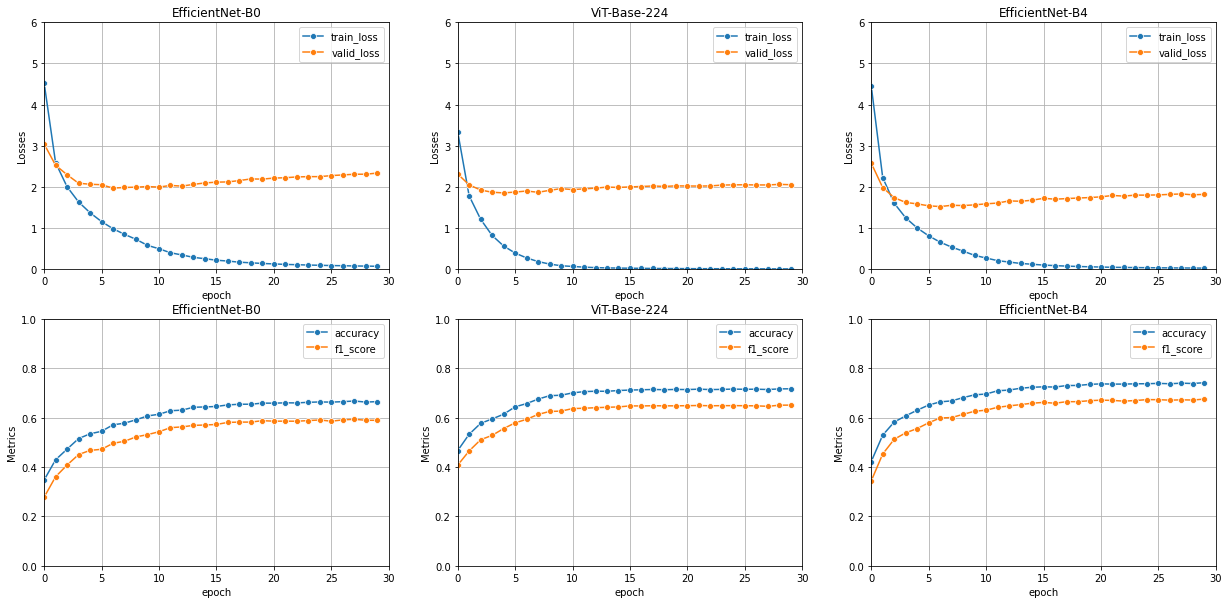

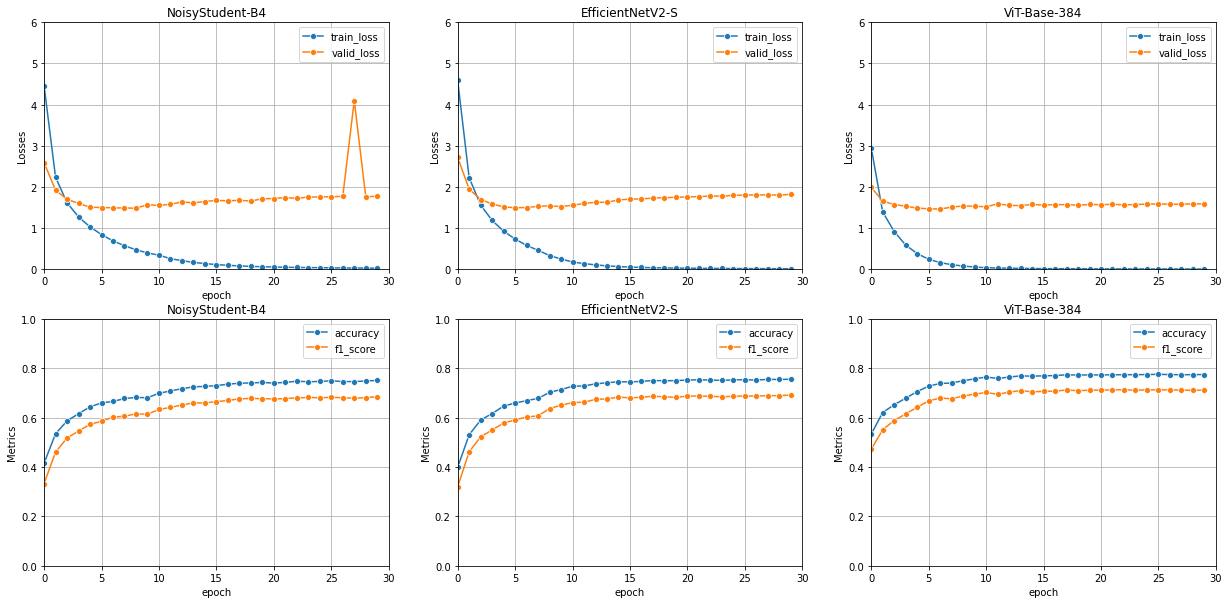

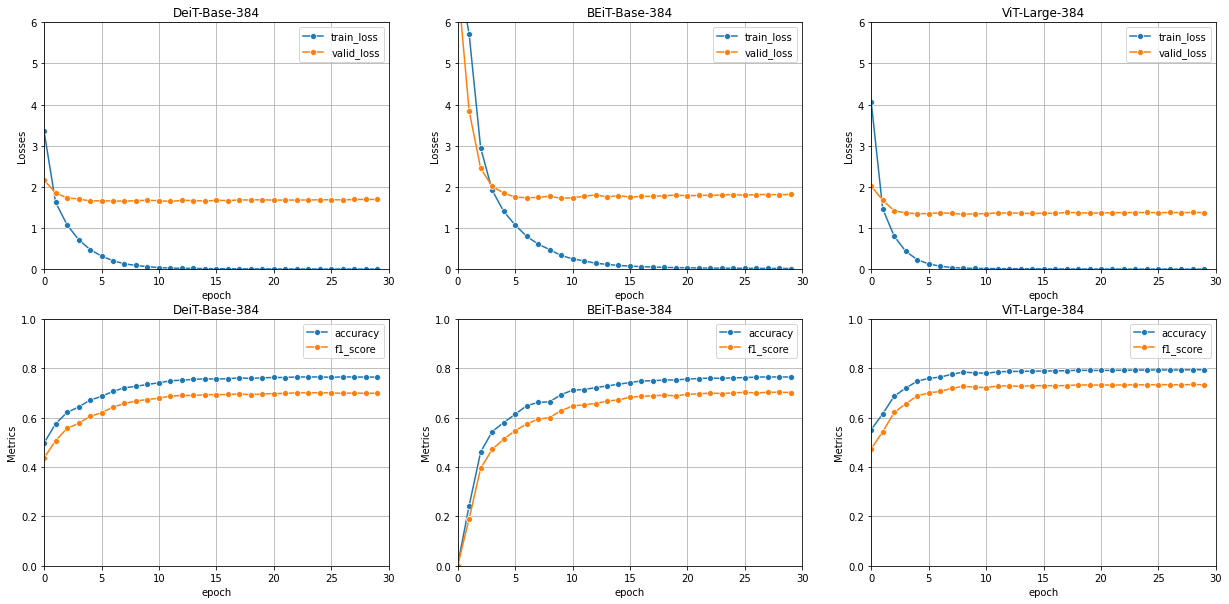

In [4]:
results.compare_training_process(group_dict, xlim=[0, 30])